In [71]:
import pandas as pd
import numpy as np
import scipy.io
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from collections import OrderedDict

In [63]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [50]:
df = pd.read_csv('../Data/df_full_split_small.csv')
print(df.columns)
df = df.drop(columns=['elite','friends','address','postal_code','latitude','longitude','review_count_y','is_open','hours'])
print(df.shape)
df = df.dropna()
print(df.shape)
df_restaurants = df[df['categories'].str.contains("Restaurants")]
df_restaurants_atlanta = df[df['city'].str.contains("Atlanta")]
print(df_restaurants.shape)
print(df_restaurants_atlanta.shape)

Index(['review_id', 'user_id', 'business_id', 'stars_x', 'useful_x', 'funny_x',
       'cool_x', 'text', 'date', 'name_x', 'review_count_x', 'yelping_since',
       'useful_y', 'funny_y', 'cool_y', 'elite', 'friends', 'fans',
       'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos', 'name_y',
       'address', 'city', 'state', 'postal_code', 'latitude', 'longitude',
       'stars_y', 'review_count_y', 'is_open', 'attributes', 'categories',
       'hours'],
      dtype='object')
(86354, 34)
(83812, 34)
(55564, 34)
(8449, 34)


In [51]:
df_restaurants.duplicated().sum()

0

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


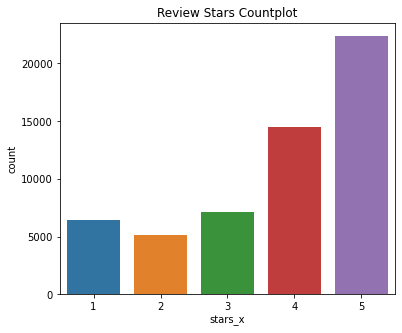

In [46]:
fig, ax = plt.subplots(figsize=(6,5))
sns.countplot(df_restaurants['stars_x'], ax=ax)
plt.title('Review Stars Countplot')
# plt.savefig('stars.png')
plt.show()

In [66]:
map_five = df_restaurants['stars_x'].groupby(df_restaurants['user_id']).agg(lambda x: (np.unique(x)==5).all()).to_dict()
map_one = df_restaurants['stars_x'].groupby(df_restaurants['user_id']).agg(lambda x: (np.unique(x)==1).all()).to_dict()
df_restaurants['reviewer_five_star_only'] = df_restaurants['user_id'].map(map_five).astype(int)
df_restaurants['reviewer_one_star_only'] = df_restaurants['user_id'].map(map_one).astype(int)
df_restaurants['review_word_count'] = df_restaurants['text'].str.split().str.len()
df_restaurants

<ipython-input-66-9b3d24c15106>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants['reviewer_five_star_only'] = df_restaurants['user_id'].map(map_five).astype(int)
<ipython-input-66-9b3d24c15106>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants['reviewer_one_star_only'] = df_restaurants['user_id'].map(map_one).astype(int)
<ipython-input-66-9b3d24c15106>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,name_x,...,compliment_photos,name_y,city,state,stars_y,attributes,categories,reviewer_five_star_only,reviewer_one_star_only,review_word_count
1,xXFlLzysjYFO5bIeWbManw,lNXFvYqo0xSc1Tx2O29rxA,GvaZyy_5B_QjnaEqZV2Z6Q,5,0,0,0,omg know what if bbq fan one i looking place n...,2019-11-12 21:49:15,Kiarash,...,0,Smoke and Bones,North Vancouver,BC,4.0,"{'BikeParking': 'True', 'RestaurantsTableServi...","Barbeque, Caterers, Event Planning & Services,...",1,0,45
2,7yl4A1Yy4UBWg-TlpnXrzw,vtQ94yISCTdA9lDY2fh2yQ,P--2omGsqG9EoSmYa3dgpA,5,0,0,0,have become regular here the place transformed...,2013-06-05 21:06:36,John,...,0,Lahore Grill,Marietta,GA,3.5,"{'Alcohol': ""u'none'"", 'NoiseLevel': ""u'averag...","Indian, Caterers, Restaurants, Pakistani, Even...",1,0,87
3,lG2dI_fzGpoVCJNpox6p9A,vMDeEfPyLT6cWsxaZ5SeWw,vnKoBdTuh2lsUKASMwQYbA,5,2,0,0,we tried 6 different items lunch menu pork spa...,2015-10-13 00:15:53,Beau,...,0,ChongQing,Vancouver,BC,4.0,"{'RestaurantsDelivery': 'True', 'RestaurantsAt...","Chinese, Restaurants, Seafood, Vegetarian",1,0,47
4,ML6uITCrCpe9oAQ1BiJeGw,fQi1dTEfwj027pN_p3QTkw,ShNvAcZiG6trCKmWTAr9bw,1,0,0,0,run away fast can where begin well drink order...,2011-07-31 04:22:21,Chris,...,0,Capt's Waterfront,Salem,MA,2.5,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Seafood, American (New), Steakhouses, Restaurants",0,1,58
5,hSgS6d4kU0Bv9OLLCFuXJA,qAEeYScvfRapRlhG-UeYiQ,msBEMPAcn7eiD8GrXuHKGA,5,0,0,0,every trip hunters creek kekes worth drive tha...,2019-08-05 17:16:47,John,...,0,Keke's Breakfast Cafe,Orlando,FL,4.0,"{'WiFi': ""'no'"", 'Caters': 'True', 'Restaurant...","Restaurants, Breakfast & Brunch, Diners, Ameri...",1,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86348,v-IjTyy7op7HdUTUul0Whg,Ire0gU-jV3pvioqR-ogn7A,VspHzMf1ZV9eqHfHG-P3YQ,5,0,0,0,lots fun great hostess named catherine extreme...,2015-04-06 23:20:49,Lisa,...,0,Hofbrauhaus Columbus,Columbus,OH,4.0,"{'CoatCheck': 'False', 'RestaurantsGoodForGrou...","Bars, Restaurants, Nightlife, German, Brewerie...",1,0,25
86349,GeS5oaUzSosjSa8xMJ1_UA,46Lb-N1k8U2Qz-wsi0fCfQ,dFn5-mFvBWj4hZBh0GevMA,5,0,0,0,cream crop casual vegan eats beaverton every d...,2017-12-29 16:06:54,Eric,...,0,La Vida Veggie,Beaverton,OR,4.5,"{'RestaurantsReservations': 'False', 'Restaura...","Latin American, Vegetarian, Vegan, Restaurants",1,0,33
86351,ryHIBIEdyIoBPJhnT_6Q3w,_O0jUjG2CXNiXLqQSZiKmQ,D-_DMNa4O1C0Cz-WCZwZYQ,5,0,0,0,expensive delicious brittney great server she ...,2021-01-04 17:35:10,Jarid,...,0,Negril Village,Atlanta,GA,3.5,"{'RestaurantsReservations': 'True', 'BikeParki...","Restaurants, Caribbean, Breakfast & Brunch, Ba...",1,0,23
86352,_B5Mr_IgXNRAHIRlOHRuwA,DhBMdeZgZnfy9ujubhTzXg,lG5eARQDSoUAG7N4Bhc8zw,5,0,0,0,pepper bacon cheeseburger holy cow walla walla...,2009-08-14 07:40:02,Amanda,...,0,Burgerville,Portland,OR,3.5,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Beer, Wine & Spirits, Food, Restaurants, Burge...",1,0,46


In [65]:
# Pre-processing Text Reviews
# Remove Stop Words
stop = stopwords.words('english')
df_restaurants['text'] = df_restaurants['text'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop))

# Remove Punctuations
tokenizer = RegexpTokenizer(r'\w+')
df_restaurants['text'] = df_restaurants['text'].apply(
    lambda x: ' '.join(word for word in tokenizer.tokenize(x)))

# Lowercase Words
df_restaurants['text'] = df_restaurants['text'].apply(
    lambda x: x.lower())
print("Data Cleaning Complete")

<ipython-input-65-ce7d3f922854>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants['text'] = df_restaurants['text'].apply(


Data Cleaning Complete


<ipython-input-65-ce7d3f922854>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants['text'] = df_restaurants['text'].apply(
<ipython-input-65-ce7d3f922854>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants['text'] = df_restaurants['text'].apply(


In [73]:
# Maximum cosine similarity
review_data = df_restaurants

res = OrderedDict()

# Iterate over data and create groups of reviewers
for row in review_data.iterrows():
    if row[1].user_id in res:
        res[row[1].user_id].append(row[1].text)
    else:
        res[row[1].user_id] = [row[1].user_id]

individual_reviewer = [{'user_id': k, 'text': v} for k, v in res.items()]
df2 = dict()
df2['reviewerID'] = pd.Series([])
df2['Maximum Content Similarity'] = pd.Series([])
vector = TfidfVectorizer(min_df=0)
count = -1
for reviewer_data in individual_reviewer:
    count = count + 1
    
    # Handle Null/single review gracefully -24-Apr-2019
    try:
        tfidf = vector.fit_transform(reviewer_data['text'])
    except:
        pass
    cosine = 1 - pairwise_distances(tfidf, metric='cosine')

    np.fill_diagonal(cosine, -np.inf)
    maxx = cosine.max()

    # To handle reviewier with just 1 review
    if maxx == -np.inf:
        maxx = 0
        
    df2['reviewerID'][count] = reviewer_data['user_id']
    df2['Maximum Content Similarity'][count] = maxx

df3 = pd.DataFrame(df2, columns=['reviewerID', 'Maximum Content Similarity'])
df3
# left outer join on original datamatrix and cosine dataframe -24-Apr-2019
# df = pd.merge(review_data, df3, on="reviewerID", how="left")

# df.drop(index=np.where(pd.isnull(df))[0], axis=0, inplace=True)

<ipython-input-73-c480bd0d43a4>:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df2['reviewerID'] = pd.Series([])
<ipython-input-73-c480bd0d43a4>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df2['Maximum Content Similarity'] = pd.Series([])


,reviewerID,Maximum Content Similarity
0,lNXFvYqo0xSc1Tx2O29rxA,0.0
1,vtQ94yISCTdA9lDY2fh2yQ,0.0
2,vMDeEfPyLT6cWsxaZ5SeWw,0.0
3,fQi1dTEfwj027pN_p3QTkw,0.0
4,qAEeYScvfRapRlhG-UeYiQ,0.0
...,...,...
49112,Ire0gU-jV3pvioqR-ogn7A,0.0
49113,46Lb-N1k8U2Qz-wsi0fCfQ,0.0
49114,_O0jUjG2CXNiXLqQSZiKmQ,0.0
49115,DhBMdeZgZnfy9ujubhTzXg,0.0


In [81]:
# Maximum Number of Reviews per day per reviewer
mnr_df1 = df[['user_id', 'date']].copy()
mnr_df1 = mnr_df1.groupby(by=['date', 'user_id']).size().reset_index(name='mnr')
# mnr_df1['mnr'] = mnr_df1['mnr'] / mnr_df1['mnr'].max()
mnr_df1

,date,user_id,mnr
0,2005-03-14 19:54:52,lrMmvkfLbx2YZkiJwNs4ow,1
1,2005-05-24 05:50:33,gjZp61JZaqcLrKjEDVSPIQ,1
2,2005-06-13 20:52:29,VSbOAu9bmctgDe_HRiMgEA,1
3,2005-06-24 13:55:26,0aB_dCYBwXE5PgJAzkusmw,1
4,2005-06-29 00:03:32,0fugzxkRHWuAyrN2UcoAGg,1
...,...,...,...
83806,2021-01-28 02:54:39,7fSbC-W6TaxaY1AHmUL_xw,1
83807,2021-01-28 02:54:44,mFvF8S4QipmAEtoMxLI1ew,1
83808,2021-01-28 04:02:29,Q7CLP46RrFglHQEte6x2lQ,1
83809,2021-01-28 04:50:48,OoQuZm-0zKj69ycyE5axBw,1


In [88]:
df3 = df3.rename(columns={"reviewerID": "user_id", "Maximum Content Similarity": "mcs"})
df_final = pd.merge(df_restaurants, df3, on="user_id", how="left")
df_final = pd.merge(df_final, mnr_df1, on="user_id", how="left")
df_final = df_final.dropna()
df_final.to_csv('out.csv')
df_final

,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date_x,name_x,...,state,stars_y,attributes,categories,reviewer_five_star_only,reviewer_one_star_only,review_word_count,mcs,date_y,mnr
0,xXFlLzysjYFO5bIeWbManw,lNXFvYqo0xSc1Tx2O29rxA,GvaZyy_5B_QjnaEqZV2Z6Q,5,0,0,0,omg know what if bbq fan one i looking place n...,2019-11-12 21:49:15,Kiarash,...,BC,4.0,"{'BikeParking': 'True', 'RestaurantsTableServi...","Barbeque, Caterers, Event Planning & Services,...",1,0,45,0.0,2019-11-12 21:49:15,1
1,7yl4A1Yy4UBWg-TlpnXrzw,vtQ94yISCTdA9lDY2fh2yQ,P--2omGsqG9EoSmYa3dgpA,5,0,0,0,have become regular here the place transformed...,2013-06-05 21:06:36,John,...,GA,3.5,"{'Alcohol': ""u'none'"", 'NoiseLevel': ""u'averag...","Indian, Caterers, Restaurants, Pakistani, Even...",1,0,87,0.0,2013-06-05 21:06:36,1
2,lG2dI_fzGpoVCJNpox6p9A,vMDeEfPyLT6cWsxaZ5SeWw,vnKoBdTuh2lsUKASMwQYbA,5,2,0,0,we tried 6 different items lunch menu pork spa...,2015-10-13 00:15:53,Beau,...,BC,4.0,"{'RestaurantsDelivery': 'True', 'RestaurantsAt...","Chinese, Restaurants, Seafood, Vegetarian",1,0,47,0.0,2015-10-13 00:15:53,1
3,ML6uITCrCpe9oAQ1BiJeGw,fQi1dTEfwj027pN_p3QTkw,ShNvAcZiG6trCKmWTAr9bw,1,0,0,0,run away fast can where begin well drink order...,2011-07-31 04:22:21,Chris,...,MA,2.5,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Seafood, American (New), Steakhouses, Restaurants",0,1,58,0.0,2011-07-31 04:22:21,1
4,hSgS6d4kU0Bv9OLLCFuXJA,qAEeYScvfRapRlhG-UeYiQ,msBEMPAcn7eiD8GrXuHKGA,5,0,0,0,every trip hunters creek kekes worth drive tha...,2019-08-05 17:16:47,John,...,FL,4.0,"{'WiFi': ""'no'"", 'Caters': 'True', 'Restaurant...","Restaurants, Breakfast & Brunch, Diners, Ameri...",1,0,21,0.0,2019-08-05 17:16:47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87207,v-IjTyy7op7HdUTUul0Whg,Ire0gU-jV3pvioqR-ogn7A,VspHzMf1ZV9eqHfHG-P3YQ,5,0,0,0,lots fun great hostess named catherine extreme...,2015-04-06 23:20:49,Lisa,...,OH,4.0,"{'CoatCheck': 'False', 'RestaurantsGoodForGrou...","Bars, Restaurants, Nightlife, German, Brewerie...",1,0,25,0.0,2015-04-06 23:20:49,1
87208,GeS5oaUzSosjSa8xMJ1_UA,46Lb-N1k8U2Qz-wsi0fCfQ,dFn5-mFvBWj4hZBh0GevMA,5,0,0,0,cream crop casual vegan eats beaverton every d...,2017-12-29 16:06:54,Eric,...,OR,4.5,"{'RestaurantsReservations': 'False', 'Restaura...","Latin American, Vegetarian, Vegan, Restaurants",1,0,33,0.0,2017-12-29 16:06:54,1
87209,ryHIBIEdyIoBPJhnT_6Q3w,_O0jUjG2CXNiXLqQSZiKmQ,D-_DMNa4O1C0Cz-WCZwZYQ,5,0,0,0,expensive delicious brittney great server she ...,2021-01-04 17:35:10,Jarid,...,GA,3.5,"{'RestaurantsReservations': 'True', 'BikeParki...","Restaurants, Caribbean, Breakfast & Brunch, Ba...",1,0,23,0.0,2021-01-04 17:35:10,1
87210,_B5Mr_IgXNRAHIRlOHRuwA,DhBMdeZgZnfy9ujubhTzXg,lG5eARQDSoUAG7N4Bhc8zw,5,0,0,0,pepper bacon cheeseburger holy cow walla walla...,2009-08-14 07:40:02,Amanda,...,OR,3.5,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Beer, Wine & Spirits, Food, Restaurants, Burge...",1,0,46,0.0,2009-08-14 07:40:02,1
